## KNN. ТПР 9
#### Козловский А.А., гр. 2253

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import copy

### Генерация данных

In [46]:
first_count, second_count = 100, 200
first_mean, first_std = (10, 14), (3, 4)
second_min, second_max = (30, 56), (46, 84)

first = np.array([[np.random.normal(first_mean[0], 
                                    first_std[0], first_count)],
                  [np.random.normal(first_mean[1], 
                                    first_std[1], first_count)]])

second = np.array([[np.random.uniform(second_min[0], 
                                     second_max[0], second_count)], 
                   [np.random.uniform(second_min[1], 
                                     second_max[1], second_count)]])

In [47]:
def makedata(array, label):
    """Функция добавляющая метки к векторам
    array: массив векторов объектов [np.array]
    label: метка [object]"""
    return np.array([array[0][0], array[1][0], np.array([label for i in range(array.shape[2])]), 
                       np.array(['' for i in range(array.shape[2])])], dtype=object).T

In [48]:
first_data = makedata(first, 'first')
second_data = makedata(second, 'second')
data = np.concatenate([first_data, second_data])

df_generated = pd.DataFrame(columns=['x', 'y', 'actual', 'prediction'], data=data)

In [49]:
df = pd.read_csv('CvsFiles/dataset.csv')
data = df.to_numpy()
data_first = df.loc[df['actual'] == 'first'].to_numpy()
data_second = df.loc[df['actual'] == 'second'].to_numpy()

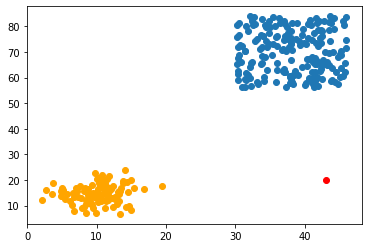

In [50]:
plt.scatter(data_first.T[0], data_first.T[1], color='orange')
plt.scatter(data_second.T[0], data_second.T[1])
plt.scatter([43], [20], color='red')
plt.show()

In [51]:
def distance(obj1, obj2):
    return np.sqrt((obj1[0] - obj2[0]) ** 2 + (obj1[1] - obj2[1]) ** 2)

In [52]:
def knn_classify(obj, data, k=7):
    distances_arg = np.argsort(np.array([distance(obj, d) for d in data]))
    first_count, second_count = 0, 0
    for arg in distances_arg[:k]:
        if data[arg][2] == 'first':
            first_count += 1
        elif data[arg][2] == 'second':
            second_count += 1
            
    return 'first' if first_count > second_count else 'second'

In [53]:
def error_count(data):
    result = 0
    for d in data:
        if d[2] != d[3]:
            result += 1
            
    return result

In [54]:
data_pred = data.copy()
for d in data_pred:
    d[3] = knn_classify(d, data_pred)
    
df_pred = pd.DataFrame(columns=df.columns, data=data_pred)
df_pred

,x,y,actual,prediction
0,14.340018,19.253972,first,first
1,11.462756,15.619155,first,first
2,13.050433,15.362229,first,first
3,9.440171,8.995339,first,first
4,12.046722,16.401269,first,first
...,...,...,...,...
295,39.332921,72.590732,second,second
296,41.074694,74.531008,second,second
297,41.768551,81.418552,second,second
298,43.772946,58.511889,second,second


In [55]:
error_count(data_pred)

0

In [56]:
knn_classify([43, 20], data)

'first'